Bienvenido al simulador de cohetes acuáticos verticales! Hoy aprenderás sobre el lanzamiento, velocidades, aceleraciones y altura utilizando una herramienta diseñada para el propósito, lo primero es diseñar nuestro modelo:

In [3]:
bottle_radius = 0.1 # [m]
bottle_height = 0.6 # [m]
water_lvl = 0.7 # %
air_pressure = 160000 # [Pa]
r_coefficient = 0.05 # %
bottle_neck_radius = 0.0008 # [m]
bottle_mass = 0.3 # [Kg]
planet_g = 10 # [m/s**2]

# No se recomiendan tocar las siguientes variables
Water_rho = 998 # [Kg / m**3]
Air_rho = 1.225 # [Kg / m**3]
atm_pressure = 101325 # [Pa]
delta_t = 0.001 # [s]
gamma = 1.4


Luego, debemos crear nuestro cohete y hacerlo despegar. 
Rocket es nuestro modelo de cohete.
Table es una clase que nos ayuda con la gestión de datos y guarda los valores de las variables en cada instante de tiempo, determinado por delta_t.
Por último generamos un archivo csv que guarda los valores ordenados en una tabla.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
#from vars import *
from rocket import *
from run import *


wmissile = Rocket(bottle_radius,
                        bottle_height,
                        water_lvl,
                        air_pressure,
                        r_coefficient,
                        bottle_neck_radius,
                        bottle_mass,
                        planet_g)

CtrlCenter = Table(wmissile)
CtrlCenter.run()

generate_csv_rocket_data(CtrlCenter.values)

Grafico Altura vs tiempo

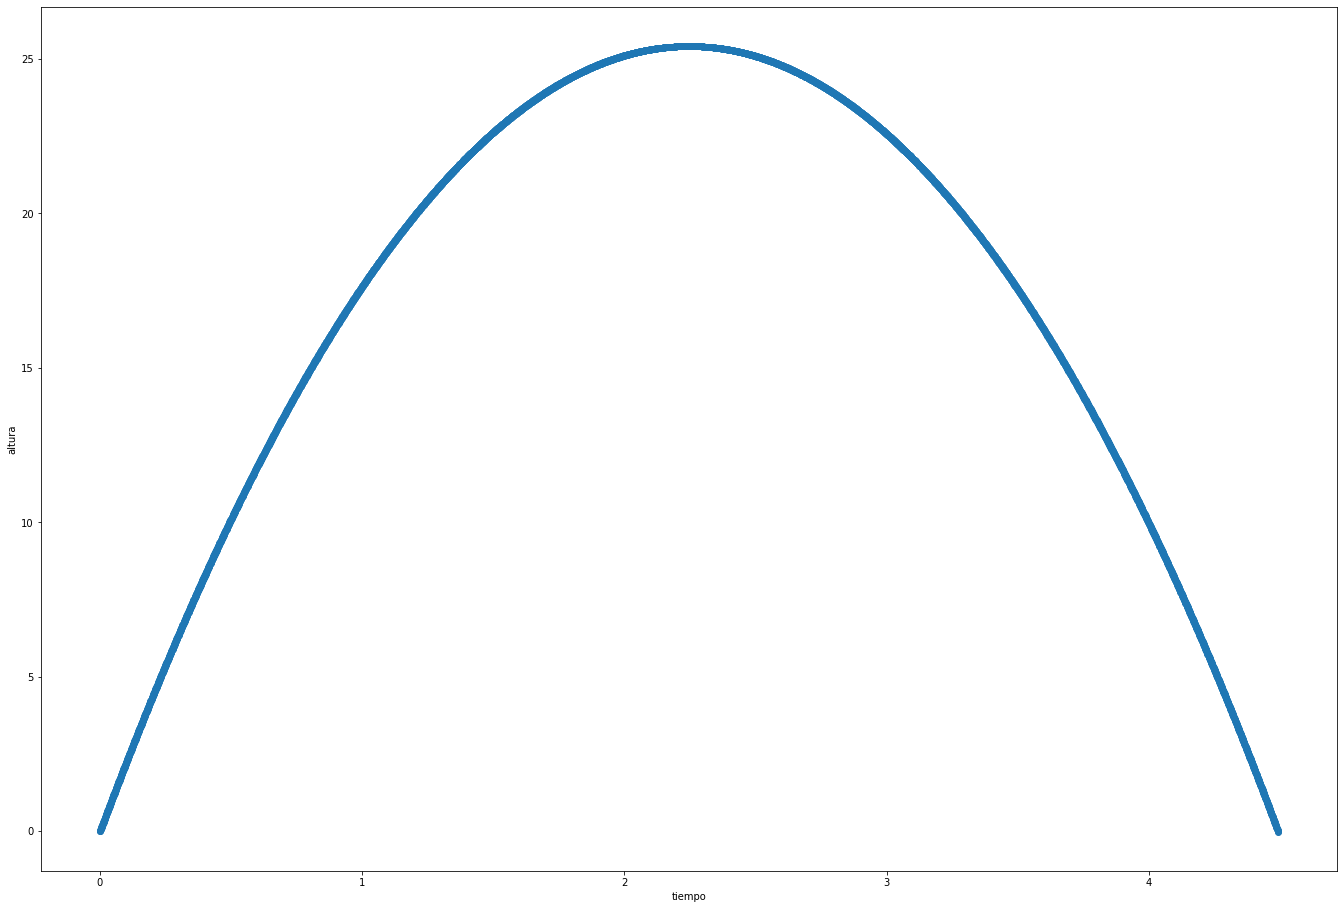

In [5]:
fluidos = pd.read_csv("rocket_data.csv", encoding = 'latin')
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.scatter(fluidos['time'], fluidos['height'])
ax.set_xlabel('tiempo')
ax.set_ylabel('altura')
plt.show()

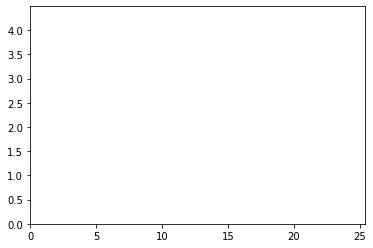

In [12]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = fluidos['time'], fluidos['height']
ln, = plt.plot([], [], 'ro')

max_heigth = 0

for value in CtrlCenter.values.values():
    if max_heigth < value['height']:
        max_heigth = value['height']

def init():
    ax.set_xlim(0, max_heigth)
    ax.set_ylim(0, CtrlCenter.rocket.t * delta_t)
    return ln,

def update(t):
    ln.set_data(xdata[t], ydata[t])
    return ln,

anim = FuncAnimation(fig, update, frames = 400, interval = 30,
                    init_func=init, blit=True)

HTML(anim.to_jshtml())

Grafico Velocidad vs tiempo

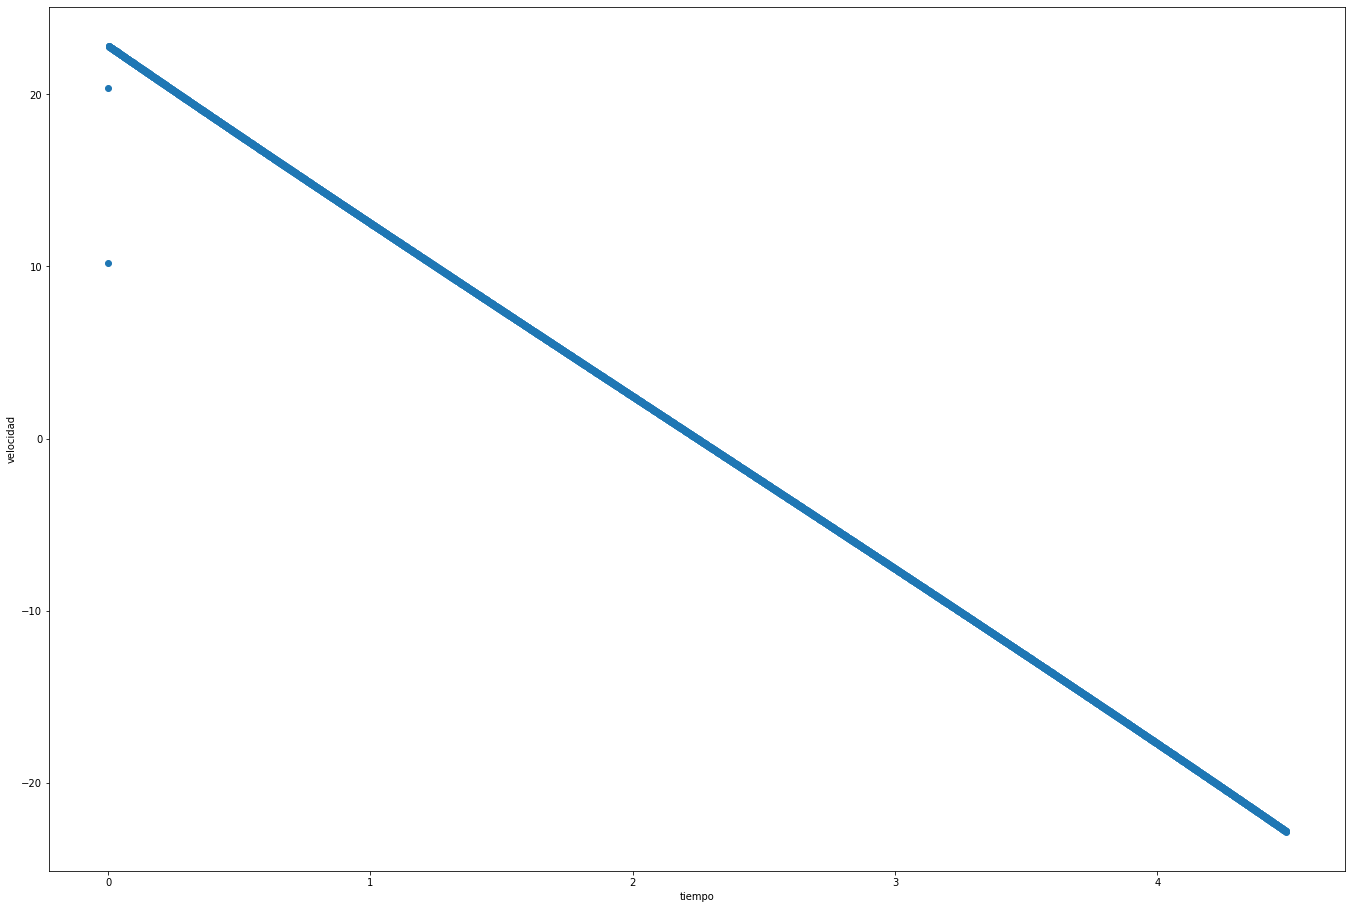

In [6]:
fluidos = pd.read_csv("rocket_data.csv", encoding = 'latin')
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.scatter(fluidos['time'], fluidos['velocity'])
ax.set_xlabel('tiempo')
ax.set_ylabel('velocidad')
plt.show()

Grafico Volumen de aire vs tiempo

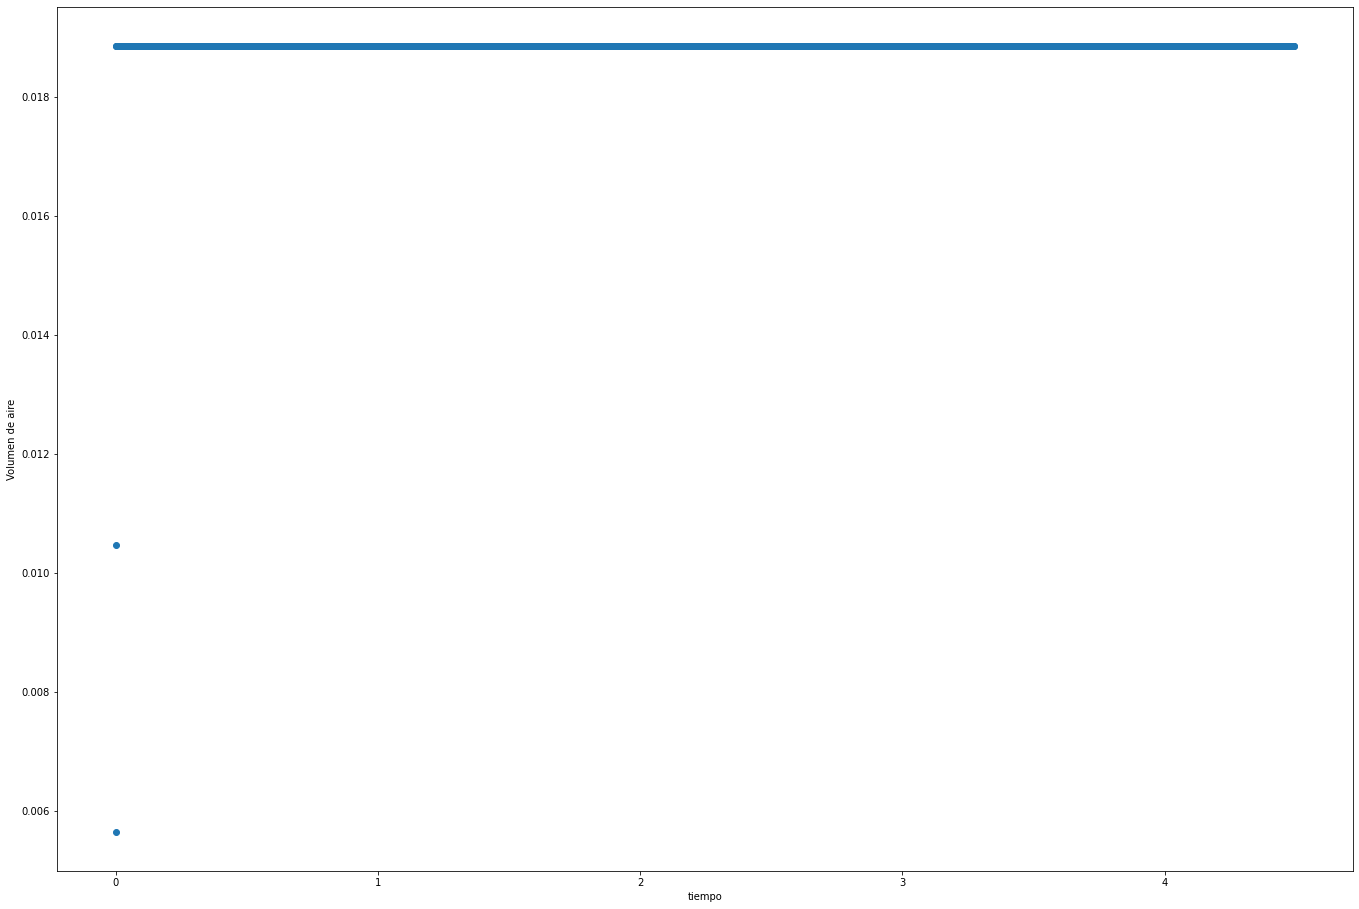

In [7]:
fluidos = pd.read_csv("rocket_data.csv", encoding = 'latin')
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.scatter(fluidos['time'], fluidos['air volume'])
ax.set_xlabel('tiempo')
ax.set_ylabel('Volumen de aire')
plt.show()

Grafico aceleración vs tiempo

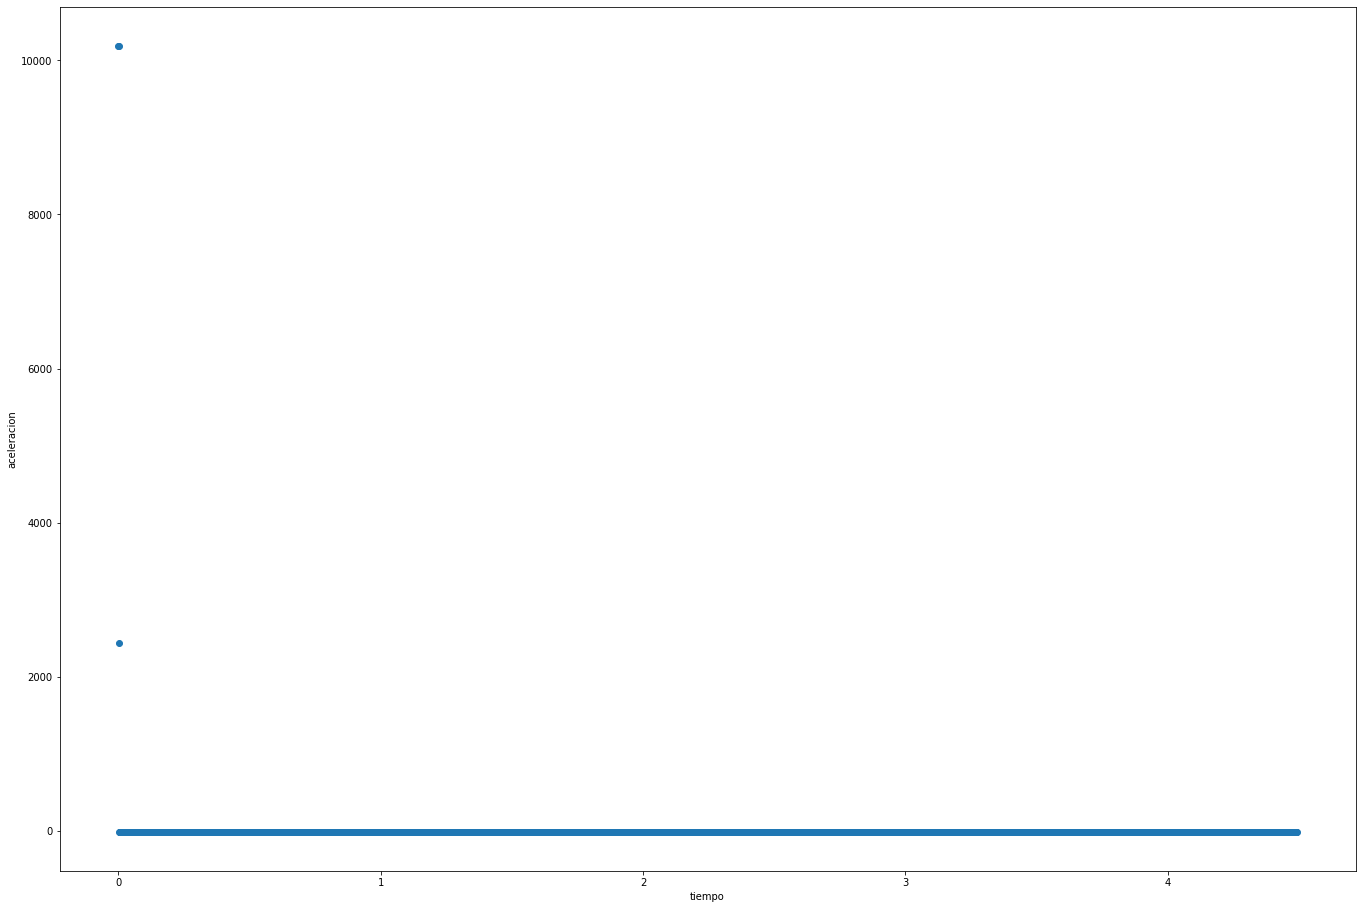

In [8]:
fluidos = pd.read_csv("rocket_data.csv", encoding = 'latin')
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.scatter(fluidos['time'], fluidos['acceleration'])
ax.set_xlabel('tiempo')
ax.set_ylabel('aceleracion')
plt.show()